In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [2]:
def load_data():
  data = pd.read_excel('stemming_label_2.xlsx')
  return data

df = load_data()
df.head()

,isi,label
0,bonus guna metode bayar transaksi sesuai prose...,NEGATIVE
1,suka belanja tokopedia diskon kembali dana bar...,NEGATIVE
2,tokopedia keren gratis ongkos kirim pelit prom...,POSITIVE
3,baru buruk kali buka produk sebentar beranda u...,NEGATIVE
4,mohon sembunyi toko aktif produk habis jual ak...,NEGATIVE


#Vectorize

In [3]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['isi'],df['label'],test_size=0.2, random_state=10)

In [4]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y)
test_y = Encoder.transform(test_y)

In [5]:
vect = TfidfVectorizer(ngram_range=(2,3))
vect.fit(train_x)

train_x_tfidf = vect.fit_transform(train_x)
test_x_tfidf = vect.transform(test_x)

In [6]:
print("X_train_shape : ",train_x_tfidf.shape)
print("X_test_shape : ",test_x_tfidf.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (800, 22857)
X_test_shape :  (200, 22857)
y_train_shape :  (800,)
y_test_shape :  (200,)


In [7]:
print("x_train : \n",train_x_tfidf)
print("\n x_test : \n",test_x_tfidf)
print("\n y_train : \n",train_y)
print("\n y_test : \n",test_y)

x_train : 
   (0, 21896)	0.15451186640081402
  (0, 18751)	0.15451186640081402
  (0, 7306)	0.15451186640081402
  (0, 13202)	0.15451186640081402
  (0, 2427)	0.15451186640081402
  (0, 18238)	0.15451186640081402
  (0, 15975)	0.15451186640081402
  (0, 19300)	0.15451186640081402
  (0, 16853)	0.15451186640081402
  (0, 16851)	0.15451186640081402
  (0, 18576)	0.15451186640081402
  (0, 11056)	0.15451186640081402
  (0, 16524)	0.15451186640081402
  (0, 11008)	0.15451186640081402
  (0, 2361)	0.15451186640081402
  (0, 3948)	0.14555265933098394
  (0, 20325)	0.15451186640081402
  (0, 4753)	0.15451186640081402
  (0, 14794)	0.15451186640081402
  (0, 18306)	0.15451186640081402
  (0, 17302)	0.15451186640081402
  (0, 21174)	0.15451186640081402
  (0, 7888)	0.1131522944887805
  (0, 21895)	0.15451186640081402
  (0, 18750)	0.15451186640081402
  :	:
  (799, 4586)	0.14948758447510088
  (799, 5484)	0.14948758447510088
  (799, 14179)	0.14948758447510088
  (799, 13907)	0.14948758447510088
  (799, 6680)	0.1494875844

#Multinomial Naive Bayes

In [8]:
MNB = MultinomialNB()
MNB.fit(train_x_tfidf, train_y)

MultinomialNB()

In [9]:
scores = cross_val_score(MNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(MNB, train_x_tfidf, train_y, cv=10).mean())

[0.85   0.8125 0.775  0.775  0.7875 0.7625 0.775  0.825  0.75   0.825 ]
K-Fold Mean ->  0.7937500000000001


In [10]:
MNB_pred = MNB.predict(test_x_tfidf)

In [11]:
print(confusion_matrix(MNB_pred, test_y))
print("MNB Accuracy Score -> ",accuracy_score(test_y, MNB_pred)*100)
print("MNB Recall Score -> ",recall_score(test_y, MNB_pred)*100)
print("MNB Precision Score -> ",precision_score(test_y, MNB_pred)*100)
print("MNB f1 Score -> ",f1_score(test_y, MNB_pred)*100)

[[93 16]
 [15 76]]
MNB Accuracy Score ->  84.5
MNB Recall Score ->  82.6086956521739
MNB Precision Score ->  83.51648351648352
MNB f1 Score ->  83.06010928961749


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       108
           1       0.84      0.83      0.83        92

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:


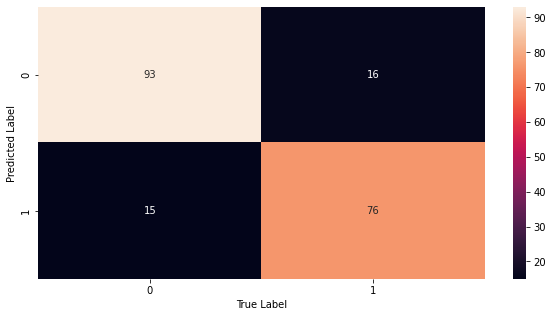



True Positive :  76
True Negative :  93
False Positive :  15
False Negative  :  16


In [12]:
print("Classification Report:")
print(classification_report(test_y, MNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(MNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, MNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [13]:
mae = mean_absolute_error(test_y, MNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.155


In [14]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_MNB = pd.DataFrame({'prediksi':MNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_MNB = pd.DataFrame(df_result_MNB['prediksi'].value_counts()/df_result_MNB['prediksi'].count()*100)
df_persen_MNB

,prediksi
0,54.50%
1,45.50%


#Bernoulli Naive Bayes

In [15]:
BNB = BernoulliNB()
BNB.fit(train_x_tfidf, train_y)

BernoulliNB()

In [16]:
scores = cross_val_score(BNB, train_x_tfidf, train_y, cv=10, scoring='accuracy')
print(scores)
print("K-Fold Mean -> ",cross_val_score(BNB, train_x_tfidf, train_y, cv=10).mean())

[0.6625 0.6875 0.6    0.6125 0.5625 0.5875 0.6    0.6375 0.5875 0.6125]
K-Fold Mean ->  0.615


In [17]:
BNB_pred = BNB.predict(test_x_tfidf)

In [18]:
print(confusion_matrix(BNB_pred, test_y))
print("BNB Accuracy Score -> ",accuracy_score(test_y, BNB_pred)*100)
print("BNB Recall Score -> ",recall_score(test_y, BNB_pred)*100)
print("BNB Precision Score -> ",precision_score(test_y, BNB_pred)*100)
print("BNB f1 Score -> ",f1_score(test_y, BNB_pred)*100)

[[56  6]
 [52 86]]
BNB Accuracy Score ->  71.0
BNB Recall Score ->  93.47826086956522
BNB Precision Score ->  62.31884057971014
BNB f1 Score ->  74.78260869565217


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.52      0.66       108
           1       0.62      0.93      0.75        92

    accuracy                           0.71       200
   macro avg       0.76      0.73      0.70       200
weighted avg       0.77      0.71      0.70       200


Confusion Matrix:


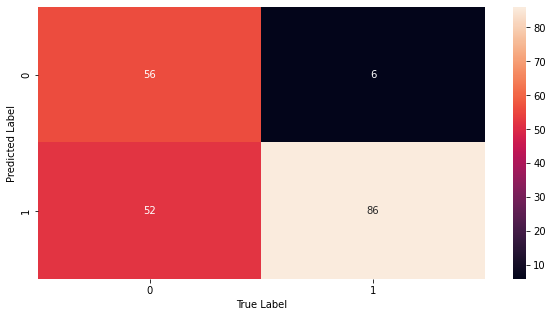



True Positive :  86
True Negative :  56
False Positive :  52
False Negative  :  6


In [19]:
print("Classification Report:")
print(classification_report(test_y, BNB_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(BNB_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, BNB_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [20]:
mae = mean_absolute_error(test_y, BNB_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.29


In [21]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_BNB = pd.DataFrame({'prediksi':BNB_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_BNB = pd.DataFrame(df_result_BNB['prediksi'].value_counts()/df_result_BNB['prediksi'].count()*100)
df_persen_BNB

,prediksi
1,69.00%
0,31.00%


#Hitung nilai C

In [22]:
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.01, 1.05, 1.25, 1.5, 2, 2.01, 2.05, 2.25, 2.5, 3]: # Menghitung nilai C
	sv = SVC(C=c)
	sv.fit(train_x_tfidf, train_y)
	print('Accuracy fot C=%s: %s'
	%(c,accuracy_score(test_y, sv.predict(test_x_tfidf)))) 

Accuracy fot C=0.01: 0.54
Accuracy fot C=0.05: 0.54
Accuracy fot C=0.25: 0.54
Accuracy fot C=0.5: 0.58
Accuracy fot C=1: 0.785
Accuracy fot C=1.01: 0.79
Accuracy fot C=1.05: 0.79
Accuracy fot C=1.25: 0.8
Accuracy fot C=1.5: 0.805
Accuracy fot C=2: 0.805
Accuracy fot C=2.01: 0.805
Accuracy fot C=2.05: 0.805
Accuracy fot C=2.25: 0.805
Accuracy fot C=2.5: 0.805
Accuracy fot C=3: 0.805


# Linear

In [23]:
linear = SVC(kernel='linear', C=2)
linear.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='linear')

In [24]:
scores = cross_val_score(linear, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(linear,train_x_tfidf, train_y, cv=10).mean())

[0.8875 0.825  0.7875 0.8    0.7125 0.7375 0.825  0.725  0.7375 0.8   ]
K-Fold Mean ->  0.78375


In [25]:
linear_pred = linear.predict(test_x_tfidf)

In [26]:
print(confusion_matrix(linear_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, linear_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, linear_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, linear_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, linear_pred)*100)

[[87 15]
 [21 77]]
SVM Accuracy Score ->  82.0
SVM Recall Score ->  83.69565217391305
SVM Precision Score ->  78.57142857142857
SVM f1 Score ->  81.05263157894737


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.79      0.84      0.81        92

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Confusion Matrix:


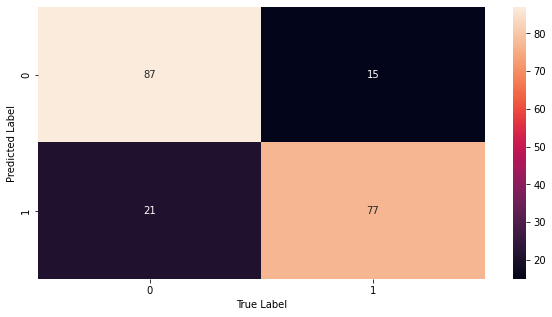



True Positive :  77
True Negative :  87
False Positive :  21
False Negative  :  15


In [27]:
print("Classification Report:")
print(classification_report(test_y, linear_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(linear_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, linear_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [28]:
mae = mean_absolute_error(test_y, linear_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.18


In [29]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_linear = pd.DataFrame({'prediksi':linear_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_linear = pd.DataFrame(df_result_linear['prediksi'].value_counts()/df_result_linear['prediksi'].count()*100)
df_persen_linear

,prediksi
0,51.00%
1,49.00%


# Polynomial 

In [30]:
poly = SVC(kernel='poly', C=2)
poly.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='poly')

In [31]:
scores = cross_val_score(poly, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,train_x_tfidf, train_y, cv=10).mean())

[0.5375 0.5375 0.5375 0.525  0.525  0.5375 0.5375 0.5375 0.525  0.5125]
K-Fold Mean ->  0.5312500000000001


In [32]:
poly_pred = poly.predict(test_x_tfidf)

In [33]:
print(confusion_matrix(poly_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, poly_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, poly_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, poly_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, poly_pred)*100)

[[108  77]
 [  0  15]]
SVM Accuracy Score ->  61.5
SVM Recall Score ->  16.304347826086957
SVM Precision Score ->  100.0
SVM f1 Score ->  28.037383177570092


Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74       108
           1       1.00      0.16      0.28        92

    accuracy                           0.61       200
   macro avg       0.79      0.58      0.51       200
weighted avg       0.78      0.61      0.53       200


Confusion Matrix:


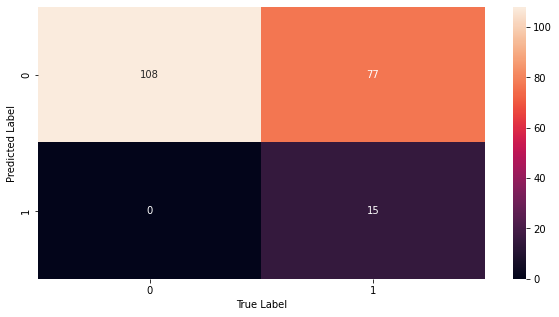



True Positive :  15
True Negative :  108
False Positive :  0
False Negative  :  77


In [34]:
print("Classification Report:")
print(classification_report(test_y, poly_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(poly_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, poly_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [35]:
mae = mean_absolute_error(test_y, poly_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.385


In [36]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_poly = pd.DataFrame({'prediksi':poly_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_poly = pd.DataFrame(df_result_poly['prediksi'].value_counts()/df_result_poly['prediksi'].count()*100)
df_persen_poly

,prediksi
0,92.50%
1,7.50%


# Radial Basis Function

In [37]:
rbf = SVC(kernel='rbf', C=2, gamma=0.50 )
rbf.fit(train_x_tfidf, train_y)

SVC(C=2, gamma=0.5)

In [38]:
scores = cross_val_score(rbf, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,train_x_tfidf, train_y, cv=10).mean())

[0.8375 0.8125 0.7125 0.8    0.7    0.7    0.8375 0.725  0.7    0.775 ]
K-Fold Mean ->  0.76


In [39]:
rbf_pred = rbf.predict(test_x_tfidf)

In [40]:
print(confusion_matrix(rbf_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, rbf_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, rbf_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, rbf_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, rbf_pred)*100)

[[88 16]
 [20 76]]
SVM Accuracy Score ->  82.0
SVM Recall Score ->  82.6086956521739
SVM Precision Score ->  79.16666666666666
SVM f1 Score ->  80.85106382978724


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.79      0.83      0.81        92

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Confusion Matrix:


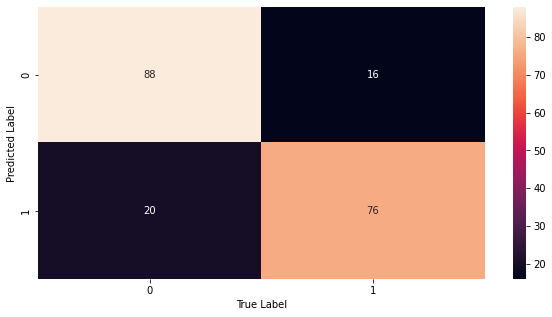



True Positive :  76
True Negative :  88
False Positive :  20
False Negative  :  16


In [41]:
print("Classification Report:")
print(classification_report(test_y, rbf_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(rbf_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, rbf_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)



In [42]:
mae = mean_absolute_error(test_y, rbf_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.18


In [43]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_rbf = pd.DataFrame({'prediksi':rbf_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_RBF = pd.DataFrame(df_result_rbf['prediksi'].value_counts()/df_result_rbf['prediksi'].count()*100)
df_persen_RBF

,prediksi
0,52.00%
1,48.00%


# Sigmoid

In [44]:
sig = SVC(kernel='sigmoid', C=2)
sig.fit(train_x_tfidf, train_y)

SVC(C=2, kernel='sigmoid')

In [45]:
scores = cross_val_score(sig, train_x_tfidf, train_y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,train_x_tfidf, train_y, cv=10).mean())

[0.8875 0.825  0.7875 0.8    0.6875 0.7375 0.8    0.7625 0.725  0.8125]
K-Fold Mean ->  0.7825


In [46]:
sig_pred = sig.predict(test_x_tfidf)

In [47]:
print(confusion_matrix(sig_pred, test_y))
print("SVM Accuracy Score -> ",accuracy_score(test_y, sig_pred)*100)
print("SVM Recall Score -> ",recall_score(test_y, sig_pred)*100)
print("SVM Precision Score -> ",precision_score(test_y, sig_pred)*100)
print("SVM f1 Score -> ",f1_score(test_y, sig_pred)*100)

[[87 15]
 [21 77]]
SVM Accuracy Score ->  82.0
SVM Recall Score ->  83.69565217391305
SVM Precision Score ->  78.57142857142857
SVM f1 Score ->  81.05263157894737


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       108
           1       0.79      0.84      0.81        92

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Confusion Matrix:


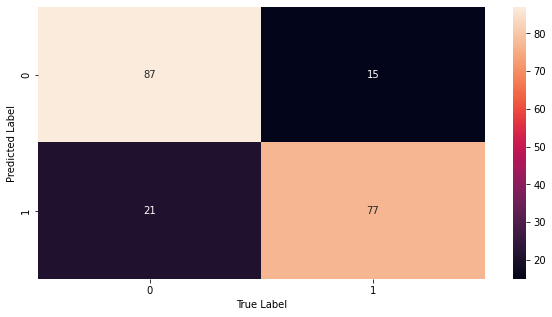



True Positive :  77
True Negative :  87
False Positive :  21
False Negative  :  15


In [48]:
print("Classification Report:")
print(classification_report(test_y, sig_pred))
print("")

print("Confusion Matrix:")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(sig_pred, test_y), annot=True, fmt=".0f", ax=ax)
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Confusion matrixSVMRBF
tn, fp, fn, tp = confusion_matrix(test_y, sig_pred).ravel()
print ('\n')
print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

In [49]:
mae = mean_absolute_error(test_y, sig_pred)
print("Mean Absolute Error (MAE): ", mae)

Mean Absolute Error (MAE):  0.18


In [50]:
#persentase label hasil prediksi menggunakan algoritma SVM
df_result_sig = pd.DataFrame({'prediksi':sig_pred})

pd.options.display.float_format = '{:,.2f}%'.format
df_persen_sig = pd.DataFrame(df_result_sig['prediksi'].value_counts()/df_result_sig['prediksi'].count()*100)
df_persen_sig

,prediksi
0,51.00%
1,49.00%
